In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.DataFrame({
    'Performance': [40, 50, 60, 70, 75, 80, 85, 90, 95, 99],
    'Promotion':   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
})

In [4]:
# Feature and target
X = data[['Performance']]
y = data['Promotion']

In [5]:
# Standardize the performance score (optional but good for sigmoid clarity)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Custom threshold
threshold = 0.6  # Change this to 0.4, 0.7, etc., depending on how strict you want to be

In [9]:
# Predict probabilities
y_probs = model.predict_proba(X_scaled)[:, 1]

# Apply custom threshold
y_custom_pred = (y_probs >= threshold).astype(int)

y_probs

array([0.08391179, 0.15159261, 0.25846122, 0.40472891, 0.48707582,
       0.57013034, 0.64941622, 0.72122885, 0.78324137, 0.82519223])

In [10]:
# Print predictions
results = pd.DataFrame({
    'Performance': X['Performance'].values,
    'Probability of Promotion': y_probs,
    f'Prediction (Threshold={threshold})': y_custom_pred
})
print(results)

   Performance  Probability of Promotion  Prediction (Threshold=0.6)
0           40                  0.083912                           0
1           50                  0.151593                           0
2           60                  0.258461                           0
3           70                  0.404729                           0
4           75                  0.487076                           0
5           80                  0.570130                           0
6           85                  0.649416                           1
7           90                  0.721229                           1
8           95                  0.783241                           1
9           99                  0.825192                           1


In [11]:
# Print model parameters
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

Intercept: -0.09
Coefficient: 1.24


In [12]:
# Create a smooth sigmoid curve for visualization
x_vals = np.linspace(-3, 3, 300).reshape(-1, 1)
y_probs = model.predict_proba(x_vals)[:, 1]

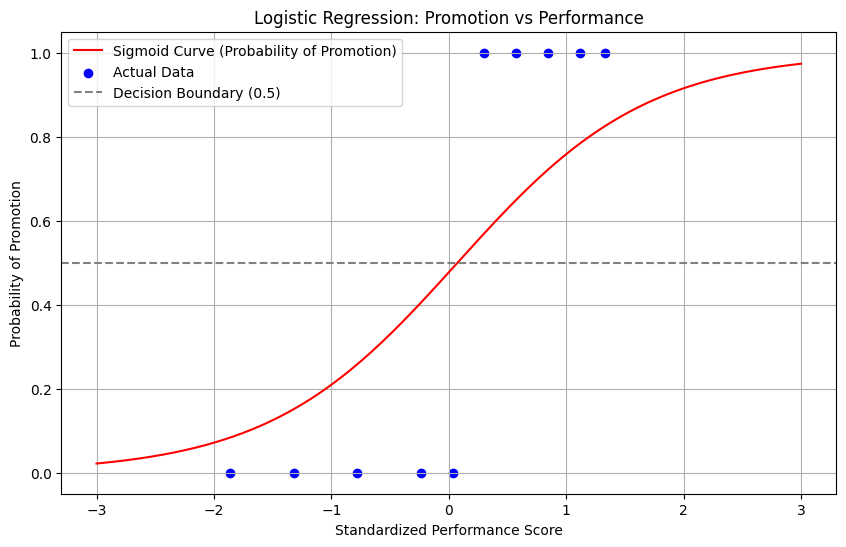

In [13]:
# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_probs, color='red', label='Sigmoid Curve (Probability of Promotion)')
plt.scatter(X_scaled, y, color='blue', label='Actual Data')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary (0.5)')
plt.title("Logistic Regression: Promotion vs Performance")
plt.xlabel("Standardized Performance Score")
plt.ylabel("Probability of Promotion")
plt.legend()
plt.grid(True)
plt.show()